In [1]:
import os 
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = "#949494"

In [3]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Skipping, found downloaded files in "./rossmann-store-sales" (use force=True to force download)


In [4]:
os.listdir('rossmann-store-sales')

['store.csv', 'train.csv', 'sample_submission.csv', 'test.csv']

In [5]:
ross_df = pd.read_csv('rossmann-store-sales/train.csv', low_memory=False)

In [6]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [7]:
store_df = pd.read_csv('rossmann-store-sales/store.csv', low_memory=False)

In [8]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [9]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
test_df = pd.read_csv('rossmann-store-sales/test.csv', low_memory=False)
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [11]:
merged_test_df = test_df.merge(store_df, how='left', on='Store') 
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [13]:
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [14]:
merged_df.duplicated().sum()

np.int64(0)

In [15]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)
merged_df['Date'].min(), merged_df['Date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [16]:
merged_test_df['Date'].min(), merged_test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

<Axes: xlabel='Sales', ylabel='Count'>

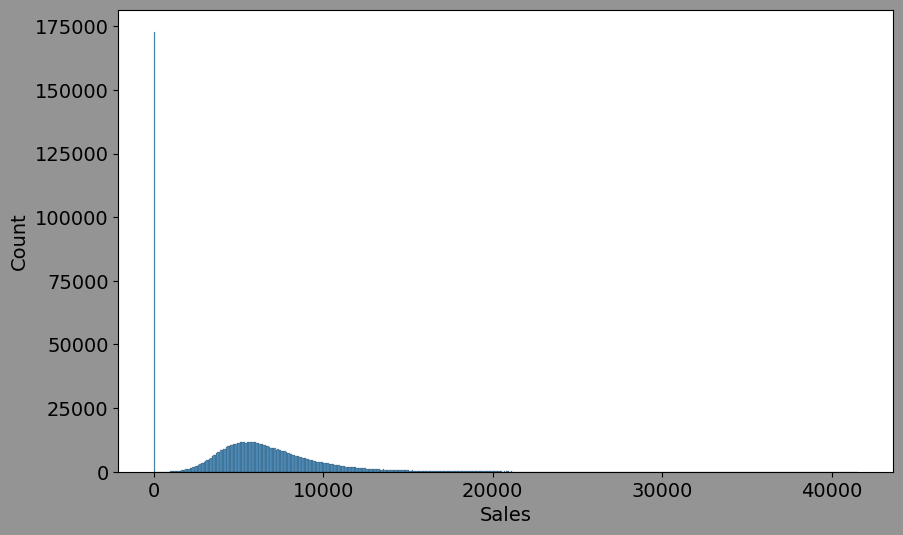

In [17]:
sns.histplot(data=merged_df, x='Sales')

In [18]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [19]:
merged_df.Sales.value_counts()[0]

np.int64(172871)

In [20]:
merged_df = merged_df[merged_df.Open == 1].copy()

<Axes: xlabel='Sales', ylabel='Count'>

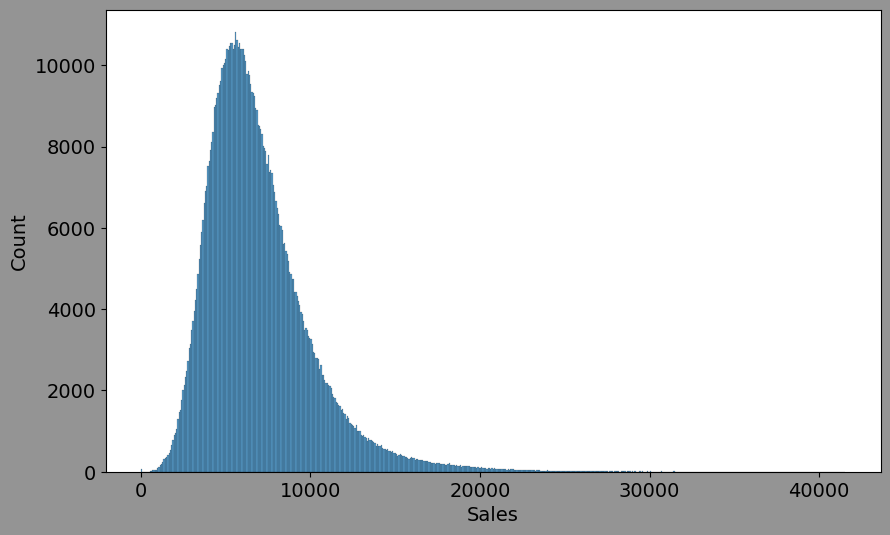

In [21]:
sns.histplot(data=merged_df, x='Sales')

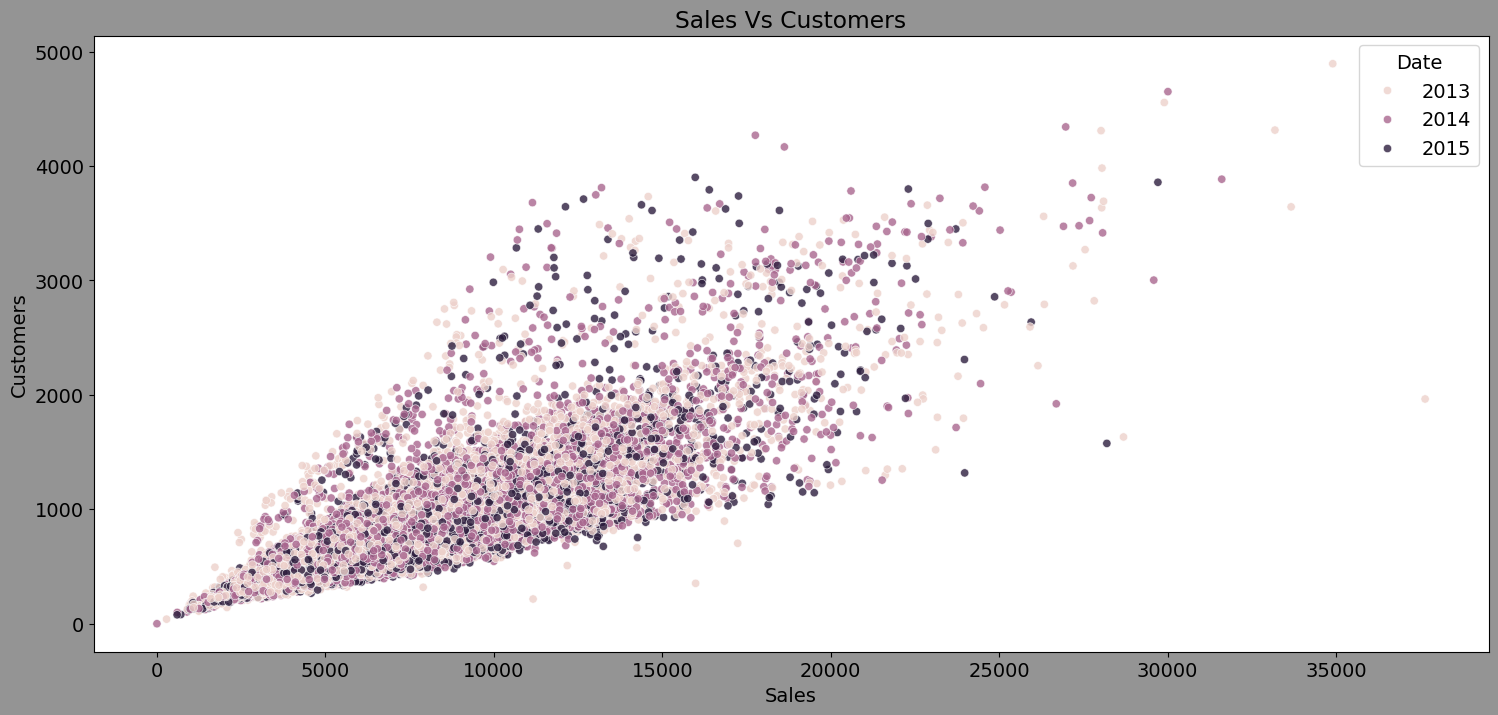

In [22]:
plt.figure(figsize=(18, 8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show()

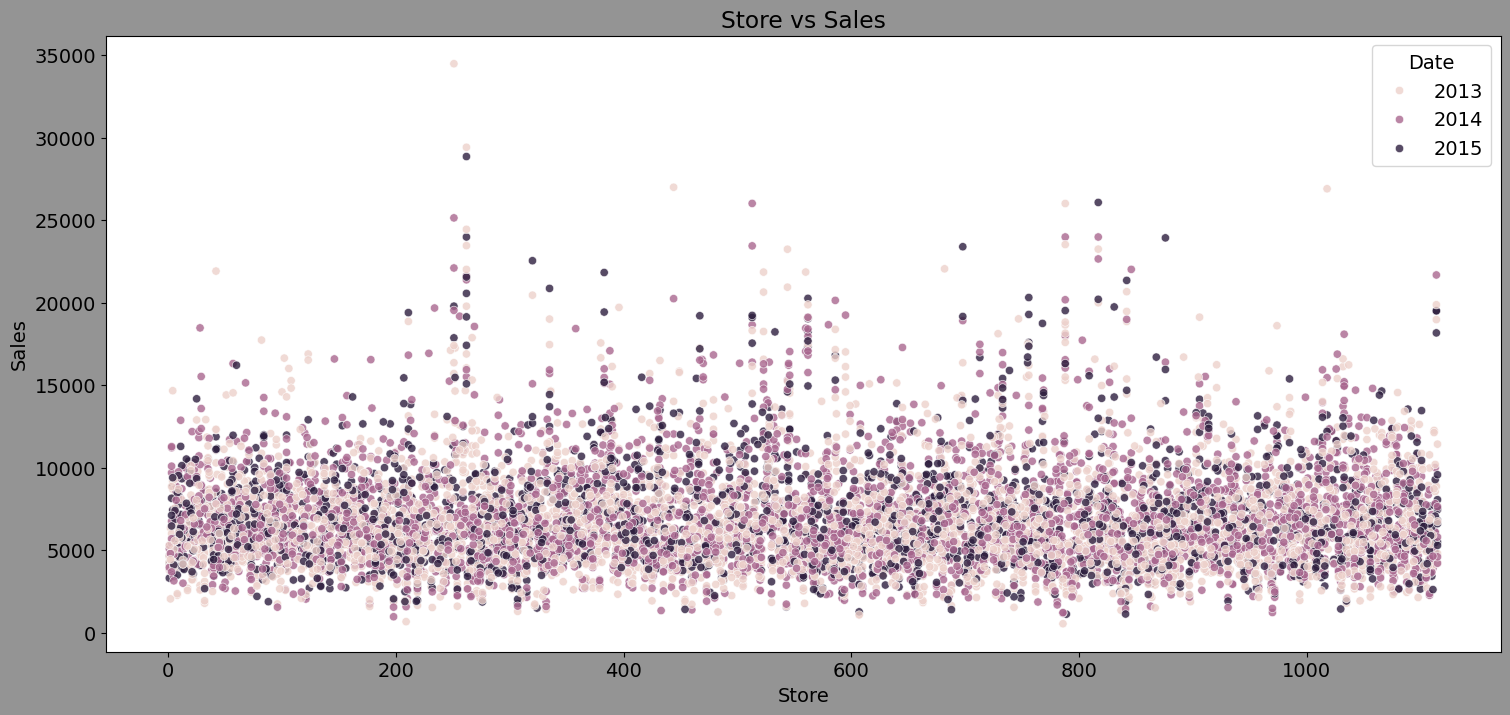

In [23]:
plt.figure(figsize=(18, 8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title('Store vs Sales')
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

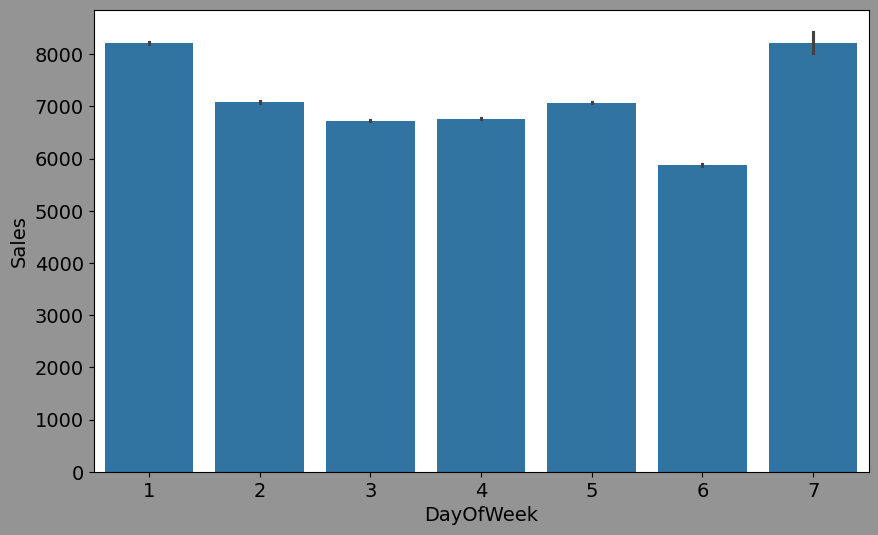

In [24]:
sns.barplot(data=merged_df,x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

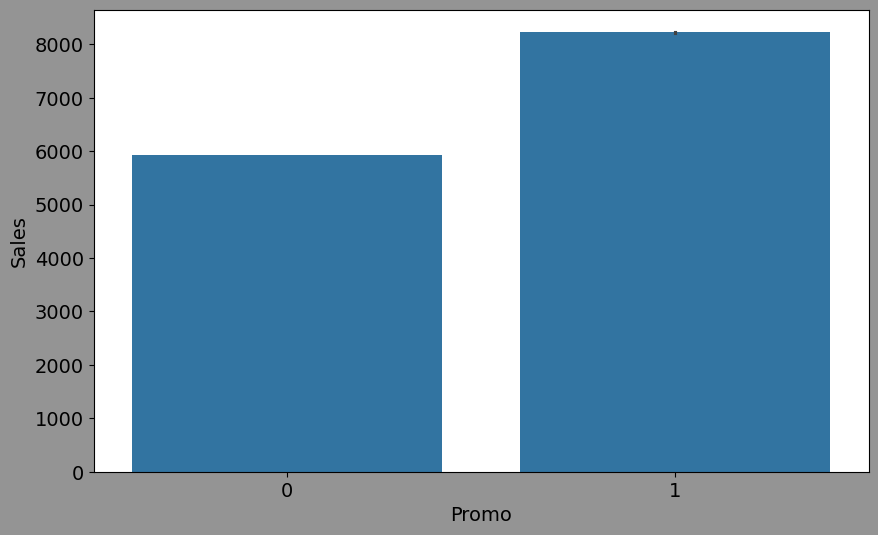

In [25]:
sns.barplot(data=merged_df, x='Promo', y='Sales')

In [26]:
merged_df.corr(numeric_only = True)['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
Name: Sales, dtype: float64

In [27]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

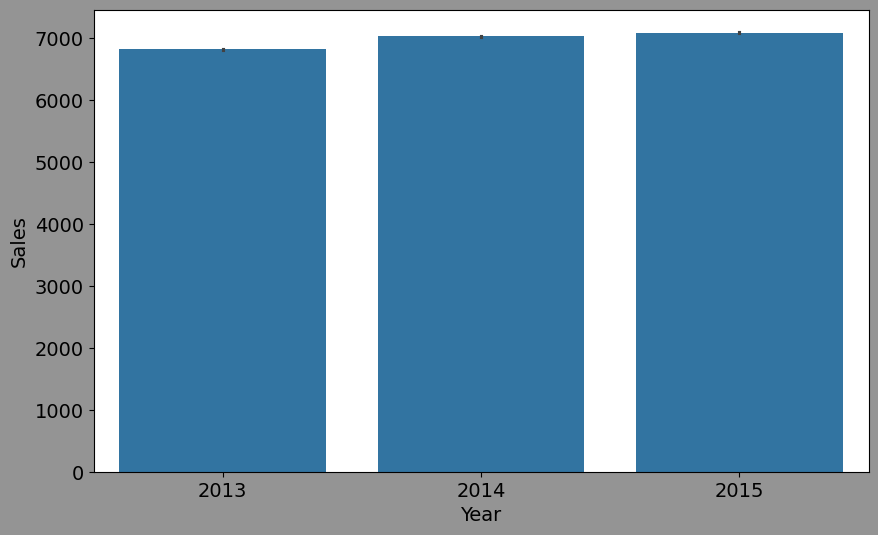

In [28]:
sns.barplot(data=merged_df, x='Year', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

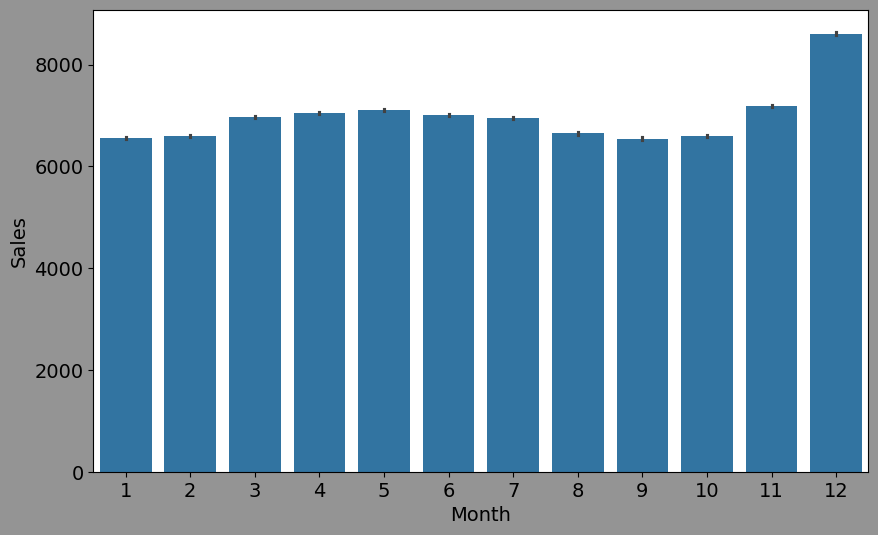

In [29]:
sns.barplot(data=merged_df, x='Month', y='Sales')

In [30]:
len(merged_df)

844392

In [31]:
train_size = int(.75 * len(merged_df))
train_size

633294

In [32]:
sorted_df = merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [33]:
len(train_df), len(val_df)

(633294, 211098)

In [34]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [35]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [36]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [37]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [38]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']
target_col = 'Sales'

In [39]:
merged_df[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [40]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = merged_test_df[input_cols].copy()


In [41]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

In [42]:
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [43]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [44]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [45]:
X_train  = train_inputs[numeric_cols+encoded_cols]
X_val  = val_inputs[numeric_cols+encoded_cols]
X_test  = test_inputs[numeric_cols+encoded_cols]

In [46]:
X_train

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [47]:
def return_mean(inputs):
    return np.full(len(inputs), merged_df.Sales.mean())

In [48]:
train_preds = return_mean(X_train)
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076], shape=(633294,))

In [49]:
math.sqrt(mean_squared_error(y_pred=train_preds, y_true=train_targets))

3082.450443277419

In [50]:
def guess_random(inputs):
    lo, hi = merged_df.Sales.min(), merged_df.Sales.max()
    return np.random.random(len(inputs))* (hi-lo) + lo

In [51]:
train_preds = guess_random(X_train)
train_preds

array([ 8876.23154853, 32351.21551097,  9733.89709438, ...,
       35424.84756151, 14234.0769968 , 26360.50884077], shape=(633294,))

In [52]:
math.sqrt(mean_squared_error(y_pred=train_preds, y_true=train_targets))

18615.58279277097

To do: Handcoded strategy

In [53]:
linreg = LinearRegression()
linreg.fit(X_train, train_targets)

LinearRegression()

In [54]:
train_preds = linreg.predict(X_train)
train_preds

array([ 7115.08762455, 10581.38651873,  7036.39236244, ...,
        6241.95353708,  5997.17125059,  5618.95124099], shape=(633294,))

In [59]:
val_preds = linreg.predict(X_val)
print(val_preds)

[5619.13905784 5619.23296627 5997.82860958 ... 8646.58181098 8401.32998235
 7843.07278986]


In [63]:
train_targets

1017190     5961
1016179     4220
1016353     6851
1016356    17267
1016368     3102
           ...  
256632      6897
256642     15736
256634      7444
256633      5207
256636      3587
Name: Sales, Length: 633294, dtype: int64

In [66]:
math.sqrt(mean_squared_error(train_preds, train_targets))

2741.587191916578

In [65]:
math.sqrt(mean_squared_error(val_preds, val_targets))

2817.7797940117125

In [67]:
def try_model(model):
    model.fit(X_train, train_targets)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    train_rmse = math.sqrt(mean_squared_error(train_targets, train_preds))
    val_rmse = math.sqrt(mean_squared_error(val_targets, val_preds))
    return train_rmse, val_rmse

In [71]:
try_model(LinearRegression())

(2741.587191916578, 2817.7797940117125)

In [72]:
try_model(Ridge())

(2741.5871950814444, 2817.7784665409868)

In [73]:
try_model(Lasso())

(2741.7143904640566, 2817.9472924045217)

In [74]:
try_model(ElasticNet())

(2879.0432103903954, 2972.665886050338)

In [75]:
try_model(SGDRegressor())

(2742.140058201382, 2817.396196684122)

In [91]:
tree = DecisionTreeRegressor(max_depth=60, random_state=42)
try_model(tree)

(0.48481018251191116, 1559.7413749187433)

In [ ]:
plt.figure(figsize=(40,20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols)

In [100]:
rf  = RandomForestRegressor(n_estimators= 200, max_depth=50, random_state=42, n_jobs=-1)
try_model(rf)

(470.0135112813617, 1370.1643262177238)

In [101]:
rf.feature_importances_

array([6.08058508e-01, 4.88512879e-02, 4.70666387e-02, 9.31895752e-03,
       3.37259980e-02, 4.35791501e-03, 2.42252314e-03, 2.10800254e-03,
       5.70739947e-03, 6.97981580e-03, 4.48446582e-03, 6.11570639e-02,
       7.77801001e-02, 1.16881558e-03, 2.16482747e-04, 3.07536044e-05,
       1.72553424e-05, 1.39189762e-02, 2.25591730e-02, 1.05202989e-02,
       1.32852898e-02, 8.43627813e-03, 5.46984578e-03, 1.23581551e-02])

In [102]:
importance_df = pd.DataFrame({
    'feature' : numeric_cols+encoded_cols,
    'importance' : rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
0,Store,0.608059
12,Promo_1,0.077780
11,Promo_0,0.061157
1,Day,0.048851
2,Month,0.047067
4,DayOfWeek_1,0.033726
18,StoreType_b,0.022559
17,StoreType_a,0.013919
20,StoreType_d,0.013285
23,Assortment_c,0.012358


<Axes: xlabel='importance', ylabel='feature'>

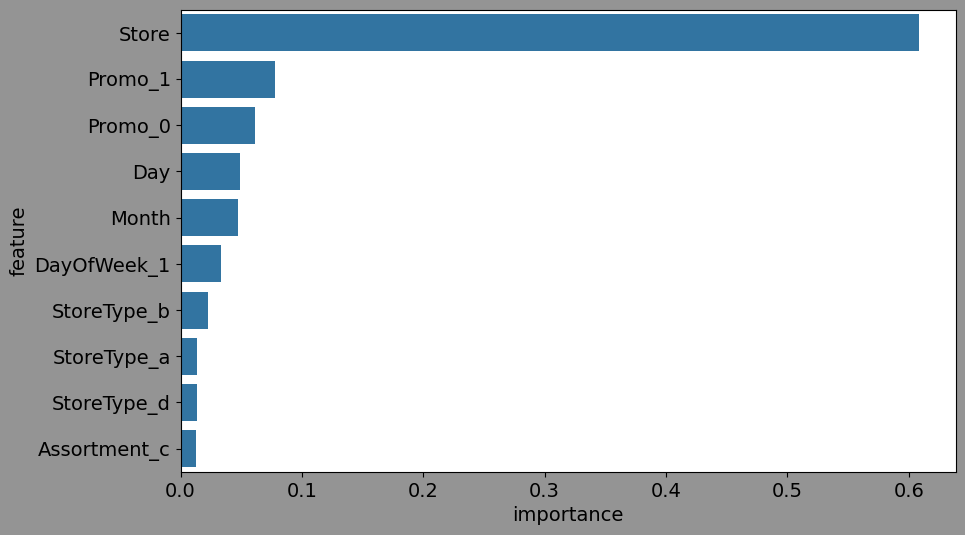

In [103]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

In [ ]:
def predict_input(model, single__input):
    if single__input['Open'] == 0:
        return 0
    input_df = pd.DataFrame([single__input])
    input_df['Date'] = pd.to_datetime(input_df.Date)
    input_df['Day'] = input_df.Date.dt.day
    input_df['Month'] = input_df.Date.dt.month
    input_df['Year'] = input_df.Date.dt.year
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    return pred
 

In [115]:
sample_input = {'Id': 1,
    'Store': 1,
    'DayOfWeek': 4,
    'Date': '2015-09-17 00:00:00',
    'Open': 1.0,
    'Promo': 1,
    'StateHoliday': '0',
    'SchoolHoliday': 0,
    'StoreType': 'c',
    'Assortment': 'a',
    'CompetitionDistance': 1270.0,
    'CompetitionOpenSinceMonth': 9.0,
    'CompetitionOpenSinceYear': 2008.8,
    'Promo2': 0,
    'Promo2SinceWeek': np.nan,
    'Promo2SinceYear': np.nan,
    'PromoInterval': np.nan,
}
sample_input

{'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.8,
 'Promo2': 0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

In [116]:
predict_input(rf, sample_input)

np.float64(4245.815)

In [117]:
test_preds = rf.predict(X_test)
test_preds

array([ 4245.815,  7699.135,  8837.07 , ...,  5961.78 , 20826.715,
        6718.435], shape=(41088,))

In [118]:
submision_df = pd.read_csv('rossmann-store-sales/sample_submission.csv')

In [124]:
submision_df['Sales'] = test_df['Open'].fillna(1).astype(int)*test_preds

In [129]:
submision_df

,Id,Sales
0,1,4245.815
1,2,7699.135
2,3,8837.070
3,4,6770.440
4,5,6516.935
...,...,...
41083,41084,3021.125
41084,41085,8917.770
41085,41086,5961.780
41086,41087,20826.715


In [130]:
submision_df.to_csv('submision.csv', index=None)